<a href="https://colab.research.google.com/github/samtbeardsley/Food_Porn/blob/master/02_Exploratory_Data_Analysis_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from skimage import io
from skimage import color
from PIL import Image
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#https://neptune.ai/blog/data-exploration-for-image-segmentation-and-object-detection
#https://www.kaggle.com/cc786537662/initial-eda-image-processing
#https://github.com/Pyligent/food101-image-classification/blob/master/food-101_EDA_Model_RestNet_final.ipynb

#image tagging options
# https://cloudinary.com/documentation/google_auto_tagging_addon
# https://smartimagetagger.com/
# https://autotag.me/
# https://www.dpreview.com/news/3608998535/this-free-ai-powered-lightroom-plug-in-will-automatically-tag-your-photos-with-keywords
# https://brandfolder.com/workbench/ai-auto-tagging
# DIY

# Intro



# Sample Images

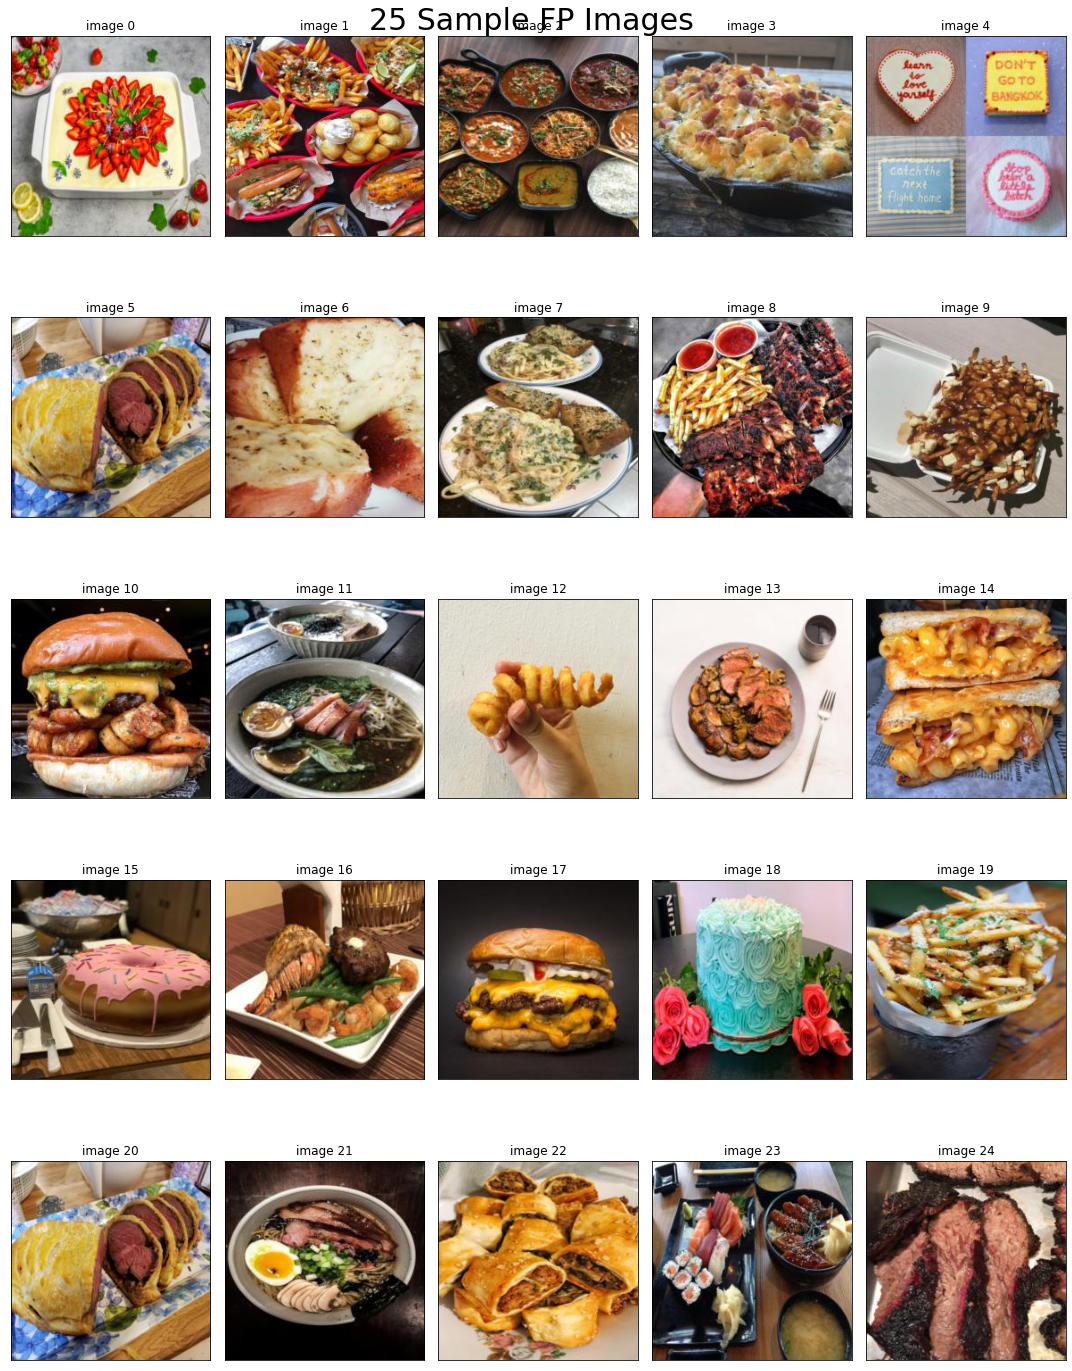

In [ ]:
rows = 5
cols = 5
axes=[]
fig=plt.figure(figsize=(15,20))

fp_path = 'drive/My Drive/FoodPorn/FP500_224x224'
fp_list = os.listdir(fp_path)

for a in range(rows*cols):
    np.random.seed(a)
    img = io.imread(f'{fp_path}/{fp_list[np.random.randint(len(fp_list))]}')
    axes.append(fig.add_subplot(rows, cols, a+1))
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title(f'image {a}')
    fig.suptitle('25 Sample FP Images \n', fontsize=30)
fig.tight_layout()    

FP images are appetizing, and aestheticly pleasing; Even the poutin (image 9) or the mac & cheese bacon sandwich (image 14). Some are even artistic (image 0 and 18). But we also see some that are simply good food that the user wished to share, such as the perfectly fried curly fry (image 12), with no attention to the presentation - this fry is in the user's hand and their shadow is cast over the image.

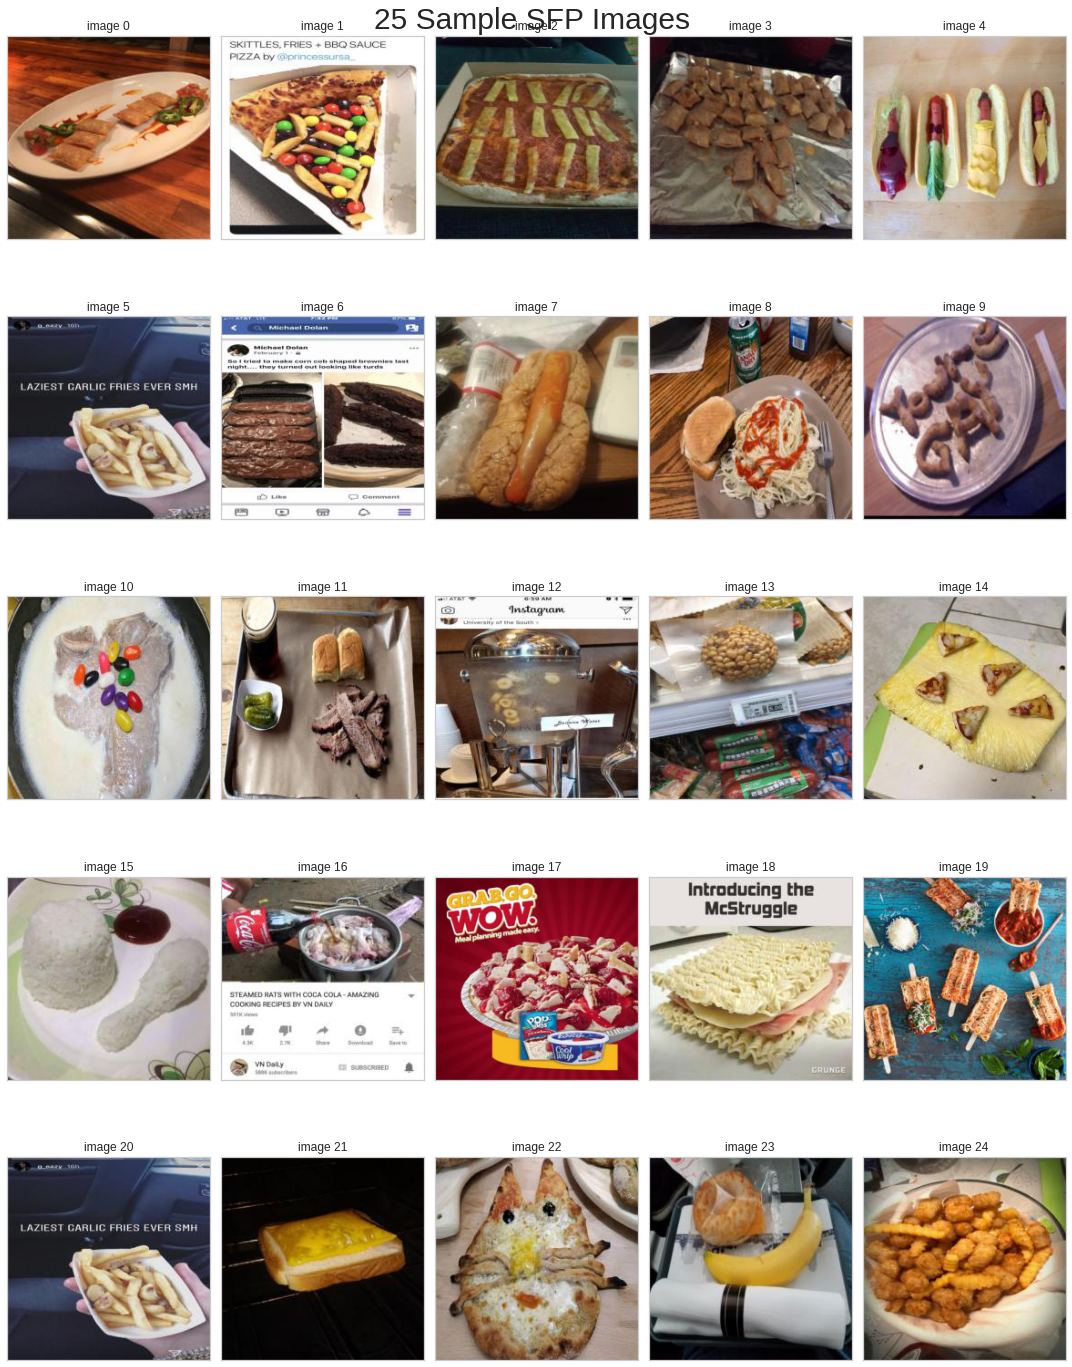

In [ ]:
rows = 5
cols = 5
axes=[]
fig=plt.figure(figsize=(15,20))

sfp_path = 'drive/My Drive/FoodPorn/SFP500_224x224'
sfp_list = os.listdir(sfp_path)

for a in range(rows*cols):
    np.random.seed(a)
    img = io.imread(f'{sfp_path}/{sfp_list[np.random.randint(len(sfp_list))]}')
    axes.append(fig.add_subplot(rows, cols, a+1))
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title(f'image {a}')
    fig.suptitle('25 Sample SFP Images \n', fontsize=30)
fig.tight_layout()                                    

The posts on SFP have a different thematic variety to them. They tend to be darker with muted colors and little attention paid to the asectics of the image. There are odd/gross combinations, such as skittles on a pizza (images 0) or a steak in milk with jelly beans (image 10), lazy or "poor man's" dinner, such as rice shaped into other foods (image 15). Another theme in the sample images is food that is well executed but a terrible design, for example, spaghetti icepops (image 19). Or, one of my personal favorites, a pasta and hot dog jello mold:

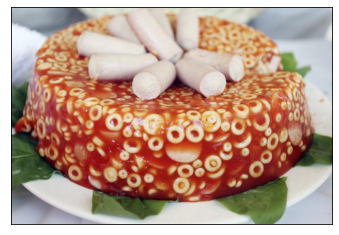

In [ ]:
img = io.imread('8mrrf7.jpg')
_ = plt.imshow(img)
_ = plt.xticks([])
_ = plt.yticks([])

# Image Intensity

In [ ]:
fp500_image_data_url = 'https://raw.githubusercontent.com/samtbeardsley/Food_Porn/master/Data/fp500_resize_data.csv'
sfp500_image_data_url = 'https://raw.githubusercontent.com/samtbeardsley/Food_Porn/master/Data/sfp500_resize_data.csv'
fp500_image_data = pd.read_csv(fp500_image_data_url)
sfp500_image_data = pd.read_csv(sfp500_image_data_url)

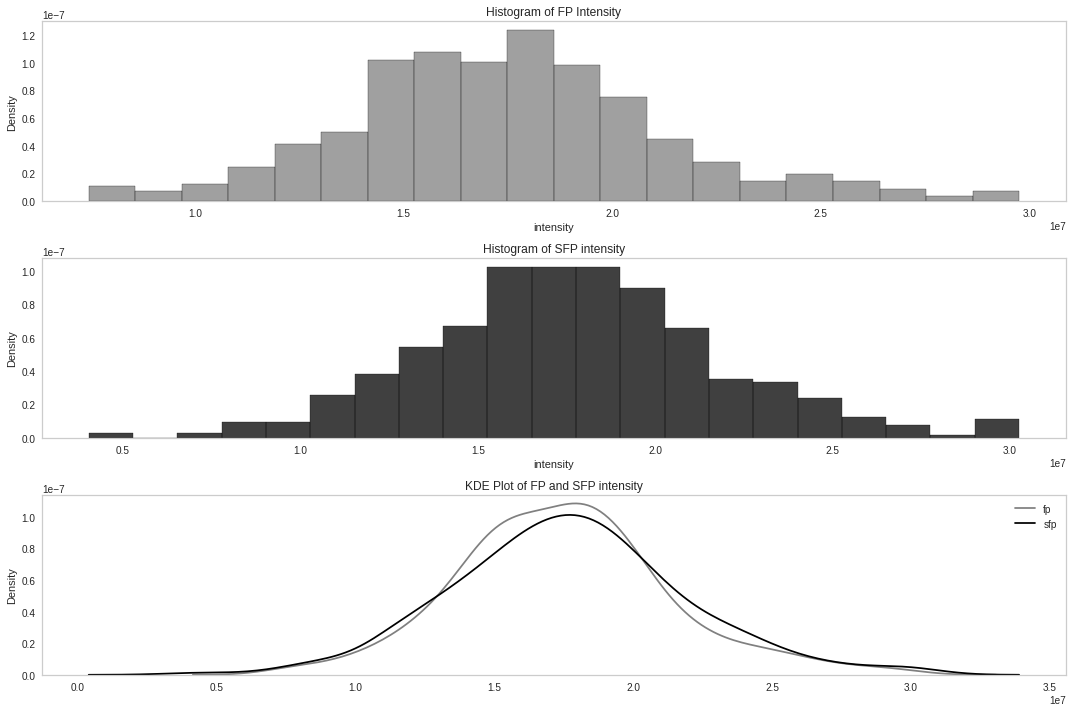

In [ ]:
f = plt.figure(figsize=(15,10))
ax1 = f.add_subplot(311).grid(False)
_ = sns.histplot(fp500_image_data.intensity, color='grey', kde=False, stat='density')
plt.title('Histogram of FP Intensity')

ax2 = f.add_subplot(312).grid(False)
_ = sns.histplot(sfp500_image_data.intensity, color='black', kde=False, stat='density')
_ = plt.title('Histogram of SFP intensity')

ax3 = f.add_subplot(313).grid(False)
_ = sns.kdeplot(fp500_image_data.intensity, color='grey')
_ = sns.kdeplot(sfp500_image_data.intensity, color='black')
_ = plt.title('KDE Plot of FP and SFP intensity')
_ = plt.legend(labels=['fp','sfp'],loc='upper right')
_ = plt.xlabel('')
plt.tight_layout()

# Color Histograms

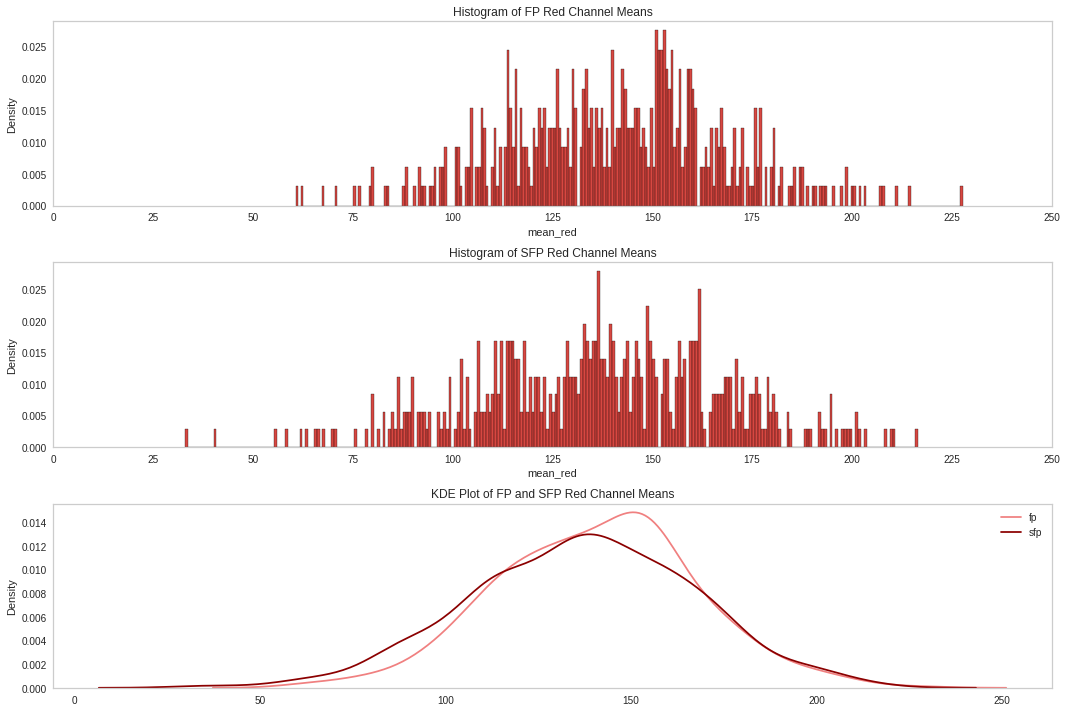

In [ ]:
f = plt.figure(figsize=(15,10))
ax1 = f.add_subplot(311).grid(False)
_ = sns.histplot(fp500_image_data.mean_red, color='r', bins=256, kde=False, stat='density')
_ = plt.title('Histogram of FP Red Channel Means')
_ = plt.xticks(np.arange(0,256,25))

ax2 = f.add_subplot(312).grid(False)
_ = sns.histplot(sfp500_image_data.mean_red, color='r', bins=256, kde=False, stat='density')
_ = plt.title('Histogram of SFP Red Channel Means')
_ = plt.xticks(np.arange(0,256,25))

ax3 = f.add_subplot(313).grid(False)
_ = sns.kdeplot(fp500_image_data.mean_red, gridsize=256, color='lightcoral')
_ = sns.kdeplot(sfp500_image_data.mean_red, gridsize=256, color='darkred')
_ = plt.title('KDE Plot of FP and SFP Red Channel Means')
_ = plt.legend(labels=['fp','sfp'],loc='upper right')
_ = plt.xlabel('')

plt.tight_layout()

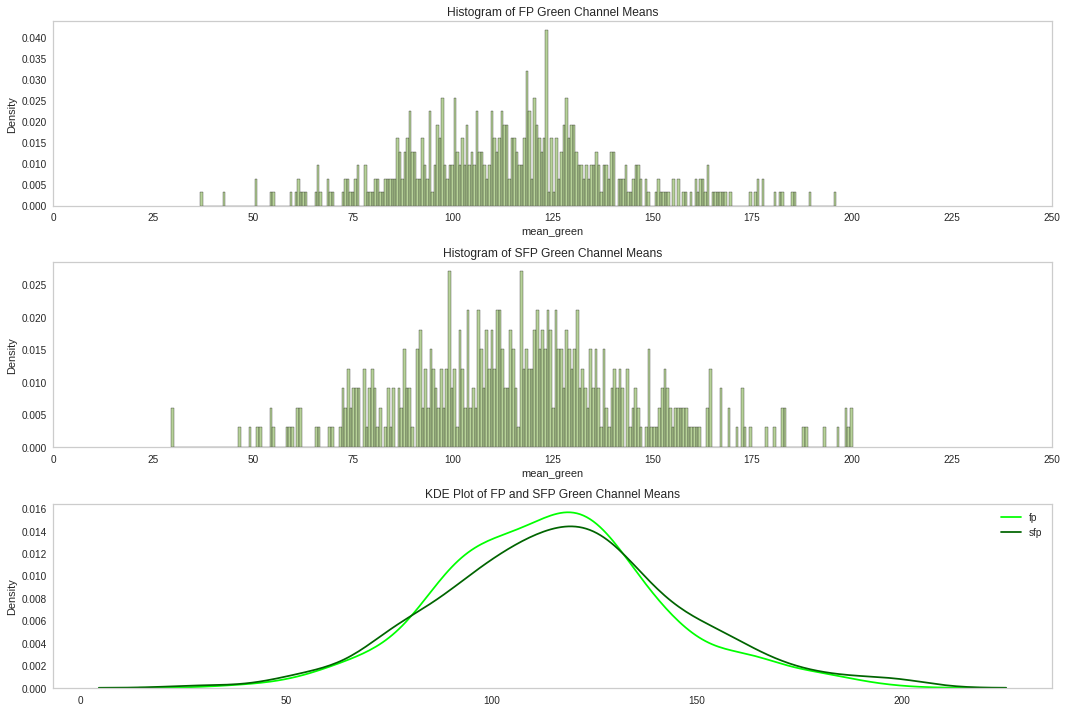

In [ ]:
f = plt.figure(figsize=(15,10))
ax1 = f.add_subplot(311).grid(False)
_ = sns.histplot(fp500_image_data.mean_green, color='g', bins=256, kde=False, stat='density')
_ = plt.title('Histogram of FP Green Channel Means')
_ = plt.xticks(np.arange(0,256,25))

ax2 = f.add_subplot(312).grid(False)
_ = sns.histplot(sfp500_image_data.mean_green, color='g', bins=256, kde=False, stat='density')
_ = plt.title('Histogram of SFP Green Channel Means')
_ = plt.xticks(np.arange(0,256,25))

ax3 = f.add_subplot(313).grid(False)
_ = sns.kdeplot(fp500_image_data.mean_green, gridsize=256, color='lime')
_ = sns.kdeplot(sfp500_image_data.mean_green, gridsize=256, color='darkgreen')
_ = plt.title('KDE Plot of FP and SFP Green Channel Means')
_ = plt.legend(labels=['fp','sfp'],loc='upper right')
_ = plt.xlabel('')
plt.tight_layout()

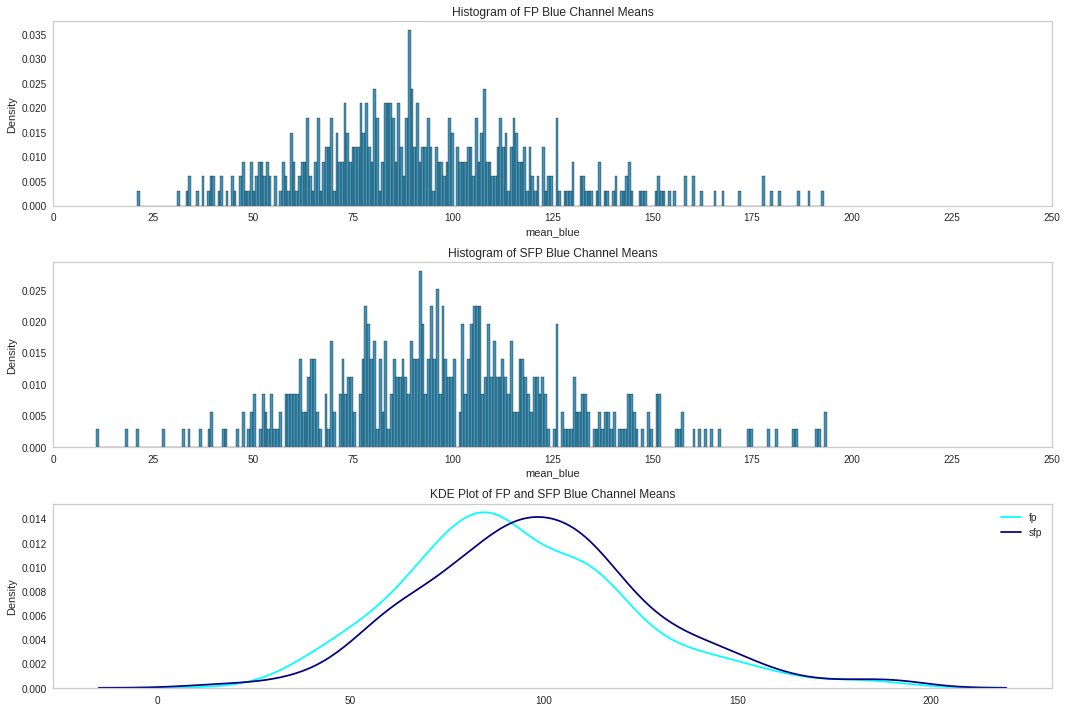

In [ ]:
f = plt.figure(figsize=(15,10))
ax1 = f.add_subplot(311).grid(False)
_ = sns.histplot(fp500_image_data.mean_blue, color='b', bins=256, kde=False, stat='density')
_ = plt.title('Histogram of FP Blue Channel Means')
_ = plt.xticks(np.arange(0,256,25))

ax2 = f.add_subplot(312).grid(False)
_ = sns.histplot(sfp500_image_data.mean_blue, color='b', bins=256, kde=False, stat='density')
_ = plt.title('Histogram of SFP Blue Channel Means')
_ = plt.xticks(np.arange(0,256,25))

ax3 = f.add_subplot(313).grid(False)
_ = sns.kdeplot(fp500_image_data.mean_blue, gridsize=256, color='aqua')
_ = sns.kdeplot(sfp500_image_data.mean_blue, gridsize=256, color='navy')
_ = plt.title('KDE Plot of FP and SFP Blue Channel Means')
_ = plt.legend(labels=['fp','sfp'],loc='upper right')
_ = plt.xlabel('')
plt.tight_layout()

# Average Image

In [ ]:
#224x224x3

# Try Kaggle notebooks for images
# Train clustering on smaller data set maybe top 250
# Reduce resolution
# Smaller data set

# avg image - each class
# avg image - each cluster

# prebuilt model that autotags

#https://medium.com/@1297rohit/transfer-learning-from-scratch-using-keras-339834b153b9
#https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c

In [ ]:
def get_flatten_image_df(path):
  """generate a dataframe of image file names, and flattened color data - one pixel per column"""
  flattened = []
  name = []
  for image in tqdm(os.listdir(path)):
    img = io.imread(f'{path}/{image}')
    try: # remove alpha channel if it exists
      img = color.rgba2rgb(img)
      flattened.append(img.ravel())
    except:
      flattened.append(img.ravel())
    name.append(image)


  name_df = pd.DataFrame(data={'path':name})
  flat_df = pd.DataFrame(data={'img_flat':flattened})
  flat_df = pd.DataFrame(flat_df['img_flat'].tolist()) # create one column for each pixel color value
  flattened_df = name_df.merge(flat_df, how='left', left_index=True, right_index=True)

  return flattened_df

In [ ]:
path = 'drive/My Drive/FoodPorn/FP500_224x224'

fp500_flat = get_flatten_image_df(path)
fp500_flat.to_csv('drive/My Drive/FoodPorn/fp500_flat.csv')

100%|██████████| 500/500 [00:01<00:00, 315.55it/s]


In [ ]:
path = 'drive/My Drive/FoodPorn/SFP500_224x224'

sfp500_flat = get_flatten_image_df(path)
sfp500_flat.to_csv('drive/My Drive/FoodPorn/sfp500_flat.csv')

100%|██████████| 500/500 [00:01<00:00, 316.52it/s]


In [ ]:
fp500_flat = pd.read_csv('drive/My Drive/FoodPorn/fp500_flat.csv', index_col=0)
sfp500_flat = pd.read_csv('drive/My Drive/FoodPorn/sfp500_flat.csv', index_col=0)

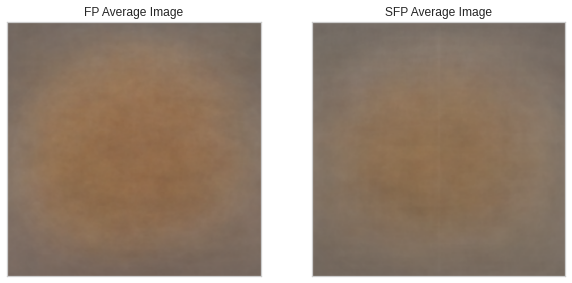

In [ ]:
# FP Average Image
fp_avg = np.mean(fp500_flat.drop(columns='path'), axis=0)

length = (len(fp_avg)/3)

fp_avg_red = np.array(fp_avg[:int(length)]).reshape((224,224))
fp_avg_green = np.array(fp_avg[int(length):int(length*2)]).reshape((224,224))
fp_avg_blue = np.array(fp_avg[int(length*2):]).reshape((224,224))

fp_avg_img = np.array([fp_avg_red, fp_avg_green, fp_avg_blue]).astype('int')

fp_avg_img.resize((224, 224, 3))

# SFP Average Image
sfp_avg = np.mean(sfp500_flat.drop(columns='path'), axis=0) 

length = (len(sfp_avg)/3)

sfp_avg_red = np.array(sfp_avg[:int(length)]).reshape((224,224))
sfp_avg_green = np.array(sfp_avg[int(length):int(length*2)]).reshape((224,224))
sfp_avg_blue = np.array(sfp_avg[int(length*2):]).reshape((224,224))

sfp_avg_img = np.array([sfp_avg_red, sfp_avg_green, sfp_avg_blue]).astype('int')

sfp_avg_img.resize((224, 224, 3))

# Plotting Average Images
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(121).grid(False)
_ = plt.imshow(fp_avg_img)
_ = plt.xticks([])
_ = plt.yticks([])
_ = plt.title('FP Average Image')

ax2 = fig.add_subplot(122).grid(False)
_ = plt.imshow(sfp_avg_img)
_ = plt.xticks([])
_ = plt.yticks([])
_ = plt.title('SFP Average Image')

# Clustering

### FP Clusters

In [ ]:
X_FP = fp500_flat.drop(columns='path')

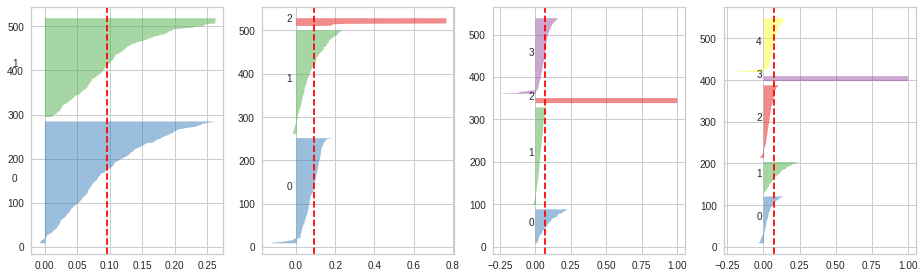

In [ ]:
fig = plt.figure(figsize=(20,10))
for i in range(2,6):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, random_state=23)
    ax = fig.add_subplot(2,5,i-1)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax)
    visualizer.fit(X_FP)

Based on the silhouette scores it appears that two clusters will be best.

In [ ]:
km = KMeans(n_clusters=2, random_state=23)
km.fit(X_FP)

pca = PCA(n_components=2, random_state=23)
pca.fit(X_FP)

fp500_pca = pca.transform(X_FP)
fp500_pca = pd.DataFrame({'component1':fp500_pca[:,0],'component2':fp500_pca[:,1], 'cluster':km.labels_})

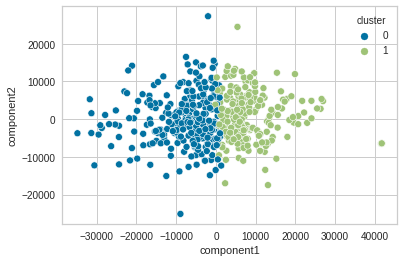

In [ ]:
_ = sns.scatterplot(data= fp500_pca, x='component1', y='component2', hue='cluster')

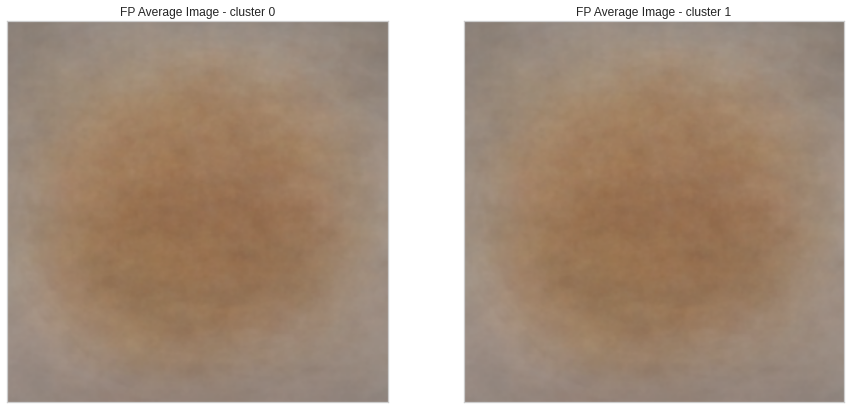

In [ ]:
fp500_flat['cluster'] = km.labels_
fig = plt.figure(figsize=(15,10))


for n in range(0,2):
  # create average image for clusters
  fp_avg_clust = np.mean(fp500_flat[fp500_flat.cluster == 0].drop(columns=['path','cluster']), axis=0)

  length = (len(fp_avg_clust)/3)

  fp_avg_red = np.array(fp_avg_clust[:int(length)]).reshape((224,224))
  fp_avg_green = np.array(fp_avg_clust[int(length):int(length*2)]).reshape((224,224))
  fp_avg_blue = np.array(fp_avg_clust[int(length*2):]).reshape((224,224))

  fp_avg_img_clust = np.array([fp_avg_red, fp_avg_green, fp_avg_blue]).astype('int')

  fp_avg_img_clust.resize((224, 224, 3))

  # plot average image per cluster
  ax = fig.add_subplot(1,2,n+1).grid(False)
  _ = plt.imshow(fp_avg_img_clust)
  _ = plt.xticks([])
  _ = plt.yticks([])
  _ = plt.title(f'FP Average Image - cluster {n}')

### SFP Clusters

In [ ]:
X_SFP = sfp500_flat.drop(columns='path')

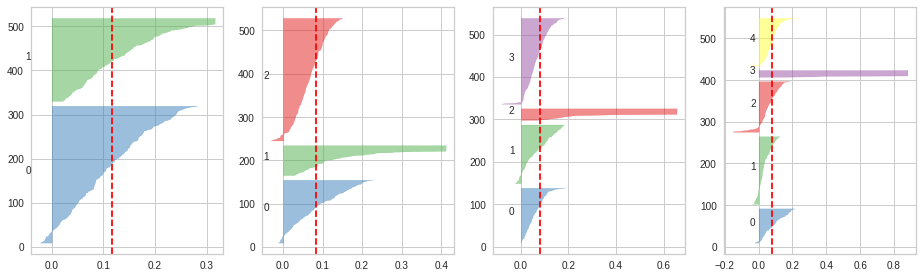

In [ ]:
fig = plt.figure(figsize=(20,10))
for i in range(2,6):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, random_state=23)
    ax = fig.add_subplot(2,5,i-1)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax)
    visualizer.fit(X_SFP)

In [ ]:
km = KMeans(n_clusters=2, random_state=23)
km.fit(X_SFP)

pca = PCA(n_components=2, random_state=23)
pca.fit(X_SFP)

sfp500_pca = pca.transform(X_SFP)
sfp500_pca = pd.DataFrame({'component1':sfp500_pca[:,0],'component2':sfp500_pca[:,1], 'cluster':km.labels_})

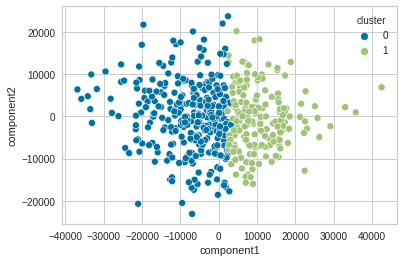

In [ ]:
_ = sns.scatterplot(data= sfp500_pca, x='component1', y='component2', hue='cluster')

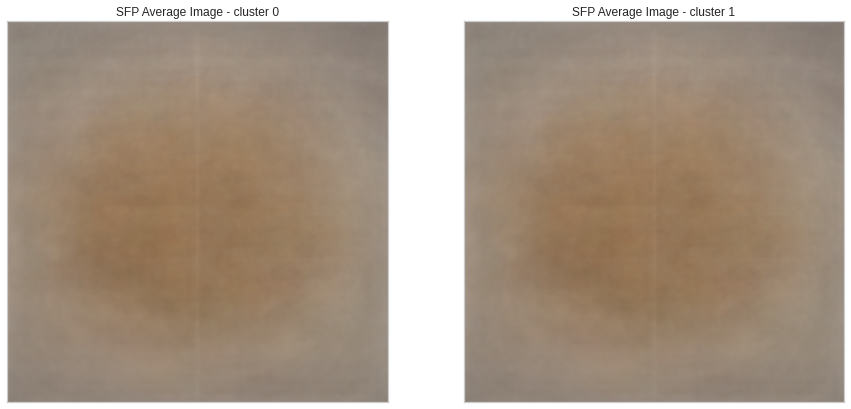

In [ ]:
sfp500_flat['cluster'] = km.labels_
fig = plt.figure(figsize=(15,10))

for n in range(0,2):
  # create average image for clusters
  sfp_avg_clust = np.mean(sfp500_flat[sfp500_flat.cluster == 0].drop(columns=['path','cluster']), axis=0)

  length = (len(fp_avg_clust)/3)

  sfp_avg_red = np.array(sfp_avg_clust[:int(length)]).reshape((224,224))
  sfp_avg_green = np.array(sfp_avg_clust[int(length):int(length*2)]).reshape((224,224))
  sfp_avg_blue = np.array(sfp_avg_clust[int(length*2):]).reshape((224,224))

  sfp_avg_img_clust = np.array([sfp_avg_red, sfp_avg_green, sfp_avg_blue]).astype('int')

  sfp_avg_img_clust.resize((224, 224, 3))

  # plot average image per cluster
  ax = fig.add_subplot(1,2,n+1).grid(False)
  _ = plt.imshow(sfp_avg_img_clust)
  _ = plt.xticks([])
  _ = plt.yticks([])
  _ = plt.title(f'SFP Average Image - cluster {n}')